## Question 6: How has the number of employees changed over time?

**Note: Little transformation was done as the extracted data was already very clean and  easy to manipulate for the visualizations**

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Extract

Data was extracted from the [Annual Business Survey (ABS) APIs](https://www.census.gov/data/developers/data-sets/abs.html).

In [2]:
url = 'https://api.census.gov/data/2017/abscs?get=NAICS2017,NAICS2017_LABEL,EMP&for=us:*'
url2 = 'https://api.census.gov/data/2018/abscs?get=NAICS2017,NAICS2017_LABEL,EMP&for=us:*'
url3 = 'https://api.census.gov/data/2019/abscs?get=NAICS2017,NAICS2017_LABEL,EMP&for=us:*'
url4 = 'https://api.census.gov/data/2020/abscs?get=NAICS2017,NAICS2017_LABEL,EMP&for=us:*'

In [3]:
response = requests.get(url)
response2 = requests.get(url2)
response3 = requests.get(url3)
response4 = requests.get(url4)

In [4]:
data = response.json()
data2 = response2.json()
data3 = response3.json()
data4 = response4.json()

columns = data[0]
columns2 = data2[0]
columns3 = data3[0]
columns4 = data4[0]

# 4 Different Data Frames were generated
df_2017 = pd.DataFrame(data[1:], columns = columns)
df_2018 = pd.DataFrame(data2[1:], columns = columns2)
df_2019 = pd.DataFrame(data3[1:], columns = columns3)
df_2020 = pd.DataFrame(data4[1:], columns = columns4)

### Transform

Columns were filtered and added.

In [5]:
df_2017 = df_2017[df_2017['NAICS2017'] == '44-45']
df_2017['Year'] = '2017'
df_2018 = df_2018[df_2018['NAICS2017'] == '44-45']
df_2018['Year'] = '2018'
df_2019 = df_2019[df_2019['NAICS2017'] == '44-45']
df_2019['Year'] = '2019'
df_2020 = df_2020[df_2020['NAICS2017'] == '44-45']
df_2020['Year'] = '2020'

All 4 Data Frames were concated together to form one Data Frame.

In [6]:
c = pd.concat([df_2017,df_2018,df_2019, df_2020])

In [7]:
c

,NAICS2017,NAICS2017_LABEL,EMP,us,Year
796,44-45,Retail trade,15981504,1,2017
6,44-45,Retail trade,15875876,1,2018
41,44-45,Retail trade,15743993,1,2019
158,44-45,Retail trade,15918206,1,2020


Columns were renamed for easier identification when generating visualization.

In [8]:
c.rename(columns = { 'NAICS2017' : 'Industry Code',
                     'NAICS2017_LABEL' : 'Industry Name',
                     'EMP' : 'Number of Employees',
                    },
                        inplace = True)

The column's data type was changed.

In [9]:
convert_dict = {
                    'Number of Employees' : np.int64
                }

c = c.astype(convert_dict)

Divided the 'Number of Employees' column by 1 Billion for better understanding in the visualization.

In [23]:
c['Number of Employees (1 Billion)'] = c['Number of Employees'] / 1000000

In [24]:
c

,Industry Code,Industry Name,Number of Employees,us,Year,Number of Employees (1 Billion)
796,44-45,Retail trade,15981504,1,2017,15.981504
6,44-45,Retail trade,15875876,1,2018,15.875876
41,44-45,Retail trade,15743993,1,2019,15.743993
158,44-45,Retail trade,15918206,1,2020,15.918206


In [27]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 796 to 158
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Industry Code                    4 non-null      object 
 1   Industry Name                    4 non-null      object 
 2   Number of Employees              4 non-null      int64  
 3   us                               4 non-null      object 
 4   Year                             4 non-null      object 
 5   Number of Employees (1 Billion)  4 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 224.0+ bytes


### Load

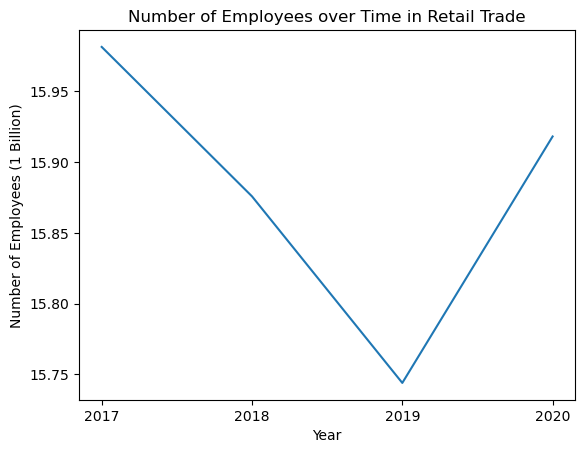

In [26]:
plt.plot(c['Year'], c['Number of Employees (1 Billion)'])
plt.title('Number of Employees over Time in Retail Trade')
plt.xlabel('Year')
plt.ylabel('Number of Employees (1 Billion)')
plt.show()